# Topic Modeling on Lyrics of popular singers





Extracting topics is a good unsupervised data-mining technique to discover the underlying relationships between texts.

Target: To find similar singers like Coldplay (my favorite song writer) regarding to semantic similarity in their lyrics, because Coldplay's lyrics is one of the reasons i like them.

# 1. Data Preparation

### 1.1 Getting data

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 150)
import csv
import requests
import lxml
import os
import re
import string

In [2]:
# Scrape data from webpage
def get_page(url):
    response = requests.get(url)
    if not response.ok:
        print('Server responded:', response.status_code)
    else:
        content = BeautifulSoup(response.text,'lxml')
    return content

1. Get lyrics of 30 poplular songs from "Coldplay" (my favorite).
2. Get lyrics from the recommended singers by Spotify (most popular online music streaming service). I add "r" at the end of those names.
3. Get lyrics from the other popular singers I randomly picked from internet: "ArianaGrande", "Beyonce", "EdSheeran", "SelenaGomez".

In [8]:
urls = ["https://www.lyricsfreak.com/search.php?q=coldplay",
      "https://www.lyricsfreak.com/search.php?q=Ariana%20Grande",
      "https://www.lyricsfreak.com/search.php?a=search&q=Beyonce",
      "https://www.lyricsfreak.com/search.php?q=Selena%20Gomez",
      "https://www.lyricsfreak.com/search.php?q=Justin%20Bieber",
      "https://www.lyricsfreak.com/search.php?q=villagers",
      "https://www.lyricsfreak.com/search.php?q=sia",
      "https://www.lyricsfreak.com/search.php?q=onerepublic",
      "https://www.lyricsfreak.com/search.php?a=search&q=Joe+brooks",
      "https://www.lyricsfreak.com/search.php?a=search&q=chicane"]

names = ['Coldplay','Ariana Grande','Beyonce','Selena Gomez','Justin Bieber', "Villagers(r)", "Sia(r)", "OneRepublic(r)", 
         "JoeBrooks(r)", "Chicane(r)"]

lyrics = list()
for url, name in zip(urls, names):
    source = get_page(url)
    lyric_urls = [i['href'] for i in source.findAll("a",{'class': 'song'})][:30]
    l = ''
    for l in lyric_urls:
        soup = get_page("https://www.lyricsfreak.com"+l)
        lyric = " ".join(soup.find('div',{'class':'lyrictxt js-lyrics js-share-text-content'}).text.split())
        output = open("/Users/ruiwenzhang/Thrid Semester/capstone/lyrics/"+name+"/"+l.split("/")[3].split("_")[0]+".txt", 'w+')
        output.write(lyric)
        output.close()
         # Putting all lyrics in one giant string
        l += lyric  
    lyrics.append(l)

In [139]:
def write_string(input_file):
    all_lines = input_file.readlines()
    return " ".join(all_lines)

lyrics = list()
for filename in os.listdir(os.getcwd()+ "/lyrics"):
    if not filename.startswith('.DS'): 
        print(filename)
        l = ''
        for lyric in os.listdir(os.getcwd() + "/lyrics/" + filename):
            if not lyric.startswith('.DS'):
                input_file = open(os.getcwd() + "/lyrics/" + filename + "/" + lyric, "r+") #'r+' means reads and writes
                l += write_string(input_file)
                input_file.close()
        lyrics.append(l)

Justin Bieber
coldplay
Selena Gomez
JoeBrooks(r)
OneRepublic(r)
Chicane(r)
Ariana Grande
Beyonce
Villagers(r)
Sia(r)


In [140]:
data = {"Artist":['Justin Bieber','Coldplay','Selena Gomez', 'JoeBrooks(r)','OneRepublic(r)',
                  'Chicane(r)','Ariana Grande','Beyonce',"Villagers(r)", "Sia(r)"],
       "lyrics":lyrics}

pd.set_option("max_colwidth", 150)
df = pd.DataFrame(data)


In [141]:
df.to_csv(os.getcwd()+ "/data_lyrics.csv")

### 1.2 Data Cleaning

•	Make text all lower case

•	Remove punctuation

•	Remove numerical values

•	Remove common non-sensical text (/n)

In [3]:
df_lyrics = pd.read_csv(os.getcwd()+ "/data_lyrics.csv", index_col = [0])

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ruiwenzhang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
lemmatizer = WordNetLemmatizer()

# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad','verse','cold','play','ll','doo','doodoodoo','ive','gonna','ve','got',
            'let','ain','ariana','grande','gotta','make','ena','chorus','beyonc','beyonce','uh','ay','lo','wanna','want',
            'yeah','mm','dum','ooh','da','wa','prechorus','Villagers(r)','Sia(r)','OneRepublic(r)','JoeBrooks(r)',
            'Chicane(r)','selena','ah','says','justin','bieber','aaa','aaah','ac','la','chris','martin','na','don','oh', 
            'ya','yeeeea','yep','eh','aaay','aap','abc','étai','thi','choru','wit','vers','ohhh','heeeay','hey',
            'uuuh','letras','yeeeah']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation

def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = TweetTokenizer().tokenize(text)
    text = [each.lower() for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = ' '.join([re.sub('[^A-Za-z0-9]+', ' ', each) for each in text])
    text = TweetTokenizer().tokenize(text)
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    
    return text



In [8]:
df_lyrics.lyrics = df_lyrics.lyrics.apply(lambda x: ' '.join(process_text(x)))

df_lyrics.set_index(['Artist'], inplace = True) 
df_lyrics

# some other ways of dealing with pandas dataframe
# df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
# df_lyrics.loc[:, ~df.columns.str.match('Unnamed')]

,lyrics
Artist,
Justin Bieber,angri honesti know tri apolog hope run time refere caus just need shot forgiv know know mistak mayb twice twice mean mayb coupl time redeem redeem...
Coldplay,gone mile far snow came colder day day miss hear children singin felt christma time frozen silent night dream appear outsid purpl sky diamond snow...
Selena Gomez,readi come readi come worri open invit sittin right real patient day night waitin standbi stop love hate way love day night mayb addict life lie s...
JoeBrooks(r),hold eye morn sunshin bright blind fear away time stall mind way caus heart beat need bare feet fall wave sand mile mile common tone endless night...
OneRepublic(r),guess suppos feel talk talk talk anymor guess suppos sound univers univers univers torn live live half day live life day stop think think anymor o...
Chicane(r),hold good slip away return think power stay ground midnight way home tie forev til wrist drip blood room cut rope drift night contain urg run need...
Ariana Grande,orbit know hard import love fall knee tell know better bark tree just fall leav nah just watch smoke drink pre steer clear headach start honest bo...
Beyonce,boy understand best woman chang chill guy start complain constant accus cheat jelous boy understand feel love girl know feel know feel lose love l...
Villagers(r),scuse die million time meet eye promis leav shelf hook blame yes blame scuse tri somebodi decid come ove place heart begin swell forget wear face ...


In [9]:
df_lyrics.to_csv(os.getcwd()+'/df_clean.csv')

In [11]:
df_lyrics = pd.read_csv(os.getcwd()+'/df_clean.csv', index_col = 0)

#### Create a Document-term Matrix

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(df_lyrics.lyrics)
df_dtm = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names(), 
                      index = df_lyrics.index)
df_dtm

,abandon,abl,aboutif,academia,academiayaaaaa,accept,accomplish,accus,aceptami,ach,...,youth,youtoday,youw,youyou,yum,yummi,yup,zip,zipper,zone
Artist,,,,,,,,,,,,,,,,,,,,,
Justin Bieber,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,56,70,0,0,0,0
Coldplay,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Selena Gomez,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
JoeBrooks(r),0,0,0,0,0,2,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
OneRepublic(r),0,2,0,0,0,0,0,0,0,1,...,2,1,0,1,0,0,0,0,0,0
Chicane(r),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ariana Grande,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,3
Beyonce,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
Villagers(r),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Exploratory Data Analysis

### 2.1 Top words

In [13]:
# Find top 30 words each Artist use
top_dict = {}
for t in df_dtm.index:
    top = df_dtm.loc[t].sort_values(ascending = False).head(30)
    top_dict[t] = list(zip(top.index.values.tolist(), top.values))

# Remove some common top words if every artist has them.
# These words don't help to distinguish their style.
words_to_stop = []
for t in df_dtm.index.values:
    top = [word for (word, count) in top_dict[t]]
    for tp in top:
        words_to_stop.append(tp)

from collections import Counter
Counter(words_to_stop).most_common()[:10]

[('know', 10),
 ('just', 10),
 ('caus', 10),
 ('love', 9),
 ('time', 9),
 ('come', 8),
 ('way', 7),
 ('heart', 7),
 ('feel', 7),
 ('babi', 5)]

### 2.2 Prepare a new Document term Matrix (unigram) for later modeling

In [26]:
new_stop_words = [word for (word, count) in Counter(words_to_stop).most_common()[:3]]

In [27]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)

vectorizer = CountVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(df_lyrics.lyrics)
df_dtm = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names(), 
                      index = df_lyrics.index)

# New Document term Matrix without new stop words
df_dtm 

,abandon,abl,aboutif,academia,academiayaaaaa,accept,accomplish,accus,aceptami,ach,...,youth,youtoday,youw,youyou,yum,yummi,yup,zip,zipper,zone
Artist,,,,,,,,,,,,,,,,,,,,,
Justin Bieber,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,56,70,0,0,0,0
Coldplay,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Selena Gomez,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
JoeBrooks(r),0,0,0,0,0,2,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
OneRepublic(r),0,2,0,0,0,0,0,0,0,1,...,2,1,0,1,0,0,0,0,0,0
Chicane(r),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ariana Grande,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,3
Beyonce,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
Villagers(r),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_dtm.to_csv(os.getcwd()+'/df_dtm.csv')

### 2.3 Word cloud visualizaiton

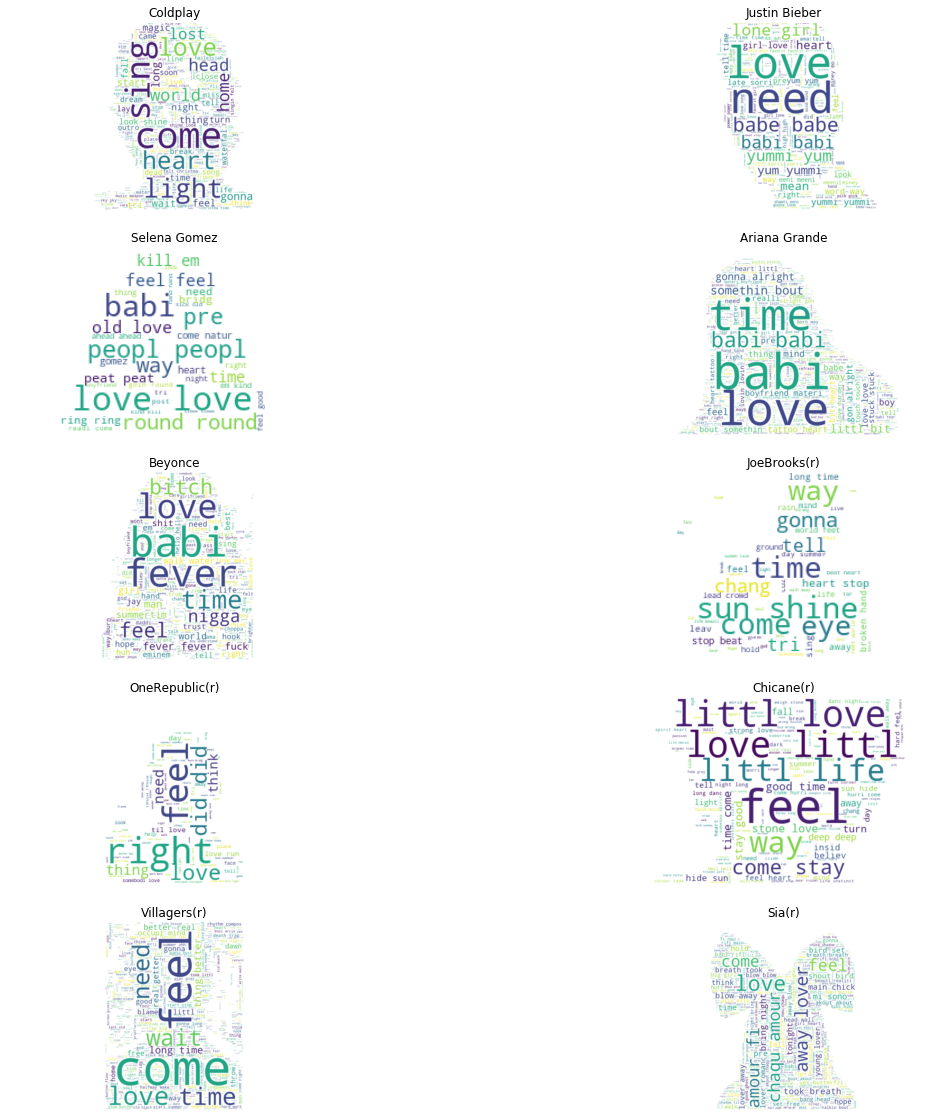

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np


Artist = ['Coldplay','Justin Bieber','Selena Gomez', 'Ariana Grande','Beyonce','JoeBrooks(r)','OneRepublic(r)',
                  'Chicane(r)',"Villagers(r)", "Sia(r)"]

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
for index,name in enumerate(Artist):
    mask = np.array(Image.open('/Users/ruiwenzhang/Thrid Semester/capstone/' + name + '.jpg'))
    wc = WordCloud(stopwords=stop_words,
               mask=mask, background_color="white",
               max_words=2000, random_state=42, width=mask.shape[1],
               height=mask.shape[0])
    wc.generate(df_lyrics.loc[name]['lyrics'])
    plt.subplot(5,2,index+1)
    #plt.rcParams['figure.figsize'] = [25, 25]
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(Artist[index])
plt.show()

#### 2.3 Findings

1. Coldplay's lyrics uses "world", "head", "lost", "come", "thing" a lot, which is quite different from that of other popular singers'songs.
2. Some popular singers use "love" a lot.

### 2.4 Number of words in lyrics and number of unique words (Size of Vocabulary)

In [16]:
unique_num = list()
for name in Artist:
    unique = df_dtm.loc[name].values.nonzero()[0].size  # nonzero returns an array of position
    unique_num.append(unique)
    
num_words = list()
for name in Artist:
    number = len(df_lyrics.loc[name].values[0].split())
    num_words.append(number)

ratio = list()
for i,j in zip(unique_num, num_words):
    ratio.append(i/j)
ratio

[0.3604590505998957,
 0.23446397623174053,
 0.24185098952270082,
 0.18963782696177062,
 0.44382371198013654,
 0.3138189244383935,
 0.21167161226508407,
 0.2311348781937017,
 0.3471264367816092,
 0.2760027192386132]

Cold play has the relatively large vocabulary.


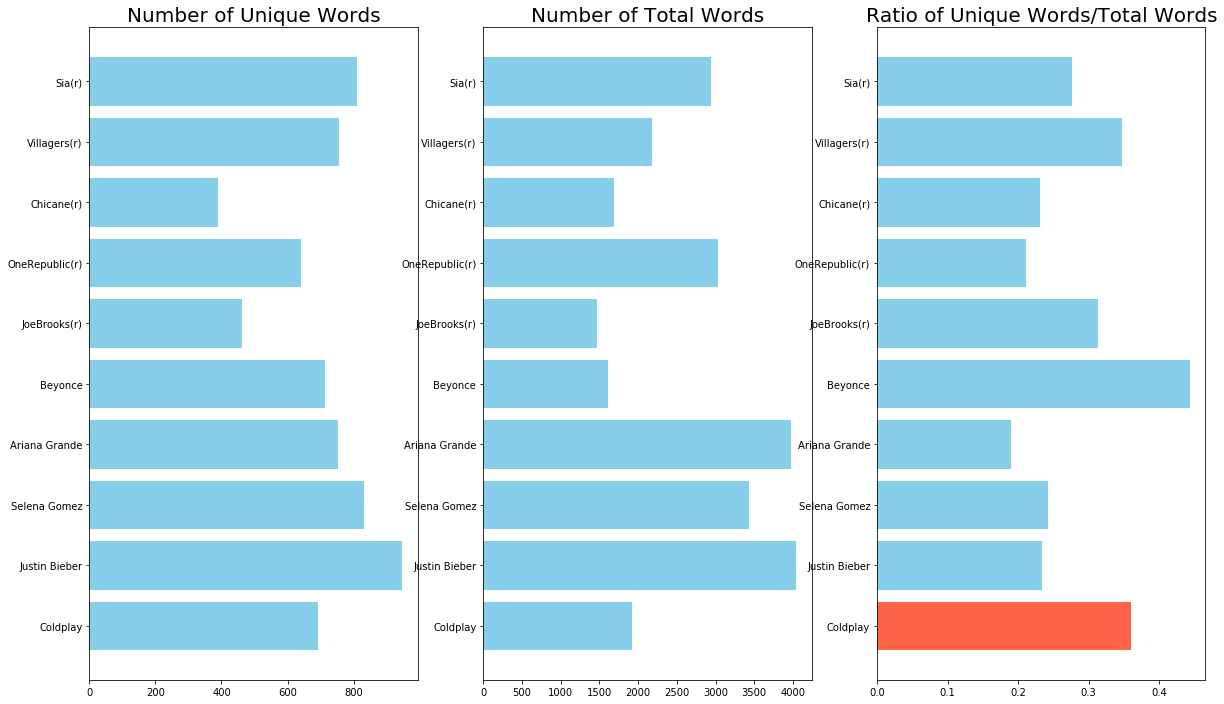

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (20,12)) 
ax1.barh(Artist,unique_num, color = 'skyblue')
ax1.set_title('Number of Unique Words', fontsize = 20)
ax2.barh(Artist,num_words, color = 'skyblue')
ax2.set_title('Number of Total Words', fontsize = 20)
ax3.barh(Artist,ratio, color = ['tomato']+('skyblue '*9).split())
ax3.set_title('Ratio of Unique Words/Total Words', fontsize = 20)
print('Cold play has the relatively large vocabulary.')

#### 2.4 Findings

1. Although Coldplay's number of unique words is relatively small, the ratio between it and the number of total words seems relatively large.

### 2.5 Number of "love", "baby" words

I'm interested in this because it seems a common word in all singer's lyrics.

In [20]:
df_lb = df_dtm[['love','babi','babe']]
dflb = pd.concat([df_lb.babi + df_lb.babe, df_lb.love], axis=1)
dflb.columns = ['baby','love']
dflb = pd.DataFrame(dflb)
dflb

,baby,love
Artist,,
Justin Bieber,161,119
Coldplay,3,16
Selena Gomez,53,142
JoeBrooks(r),5,5
OneRepublic(r),7,110
Chicane(r),2,98
Ariana Grande,199,129
Beyonce,22,31
Villagers(r),1,34


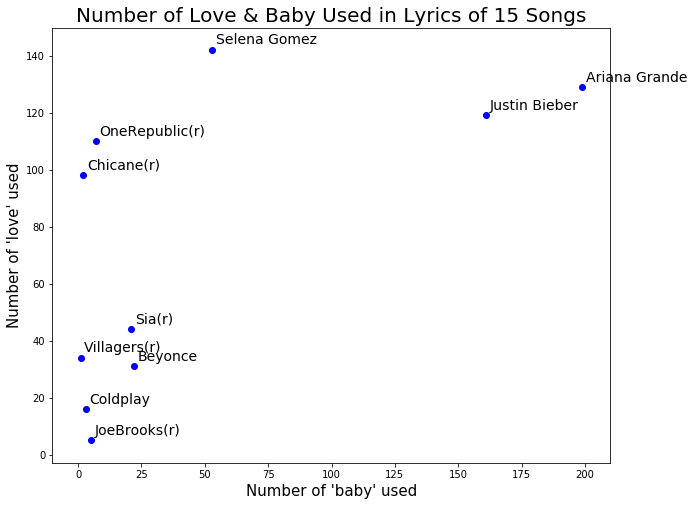

In [21]:
plt.rcParams['figure.figsize'] = [10, 8]

for i in Artist:
    x = dflb.baby[i]
    y = dflb.love[i]
    plt.scatter(x, y, color = 'blue')
    plt.text(x+1.5, y+2, i, fontsize = 14)

plt.title("Number of Love & Baby Used in Lyrics of 15 Songs", fontsize = 20)
plt.xlabel("Number of 'baby' used", fontsize = 15)
plt.ylabel("Number of 'love' used", fontsize = 15)
plt.show()

#### 2.5 Findings

 1. Coldplay rarely uses "baby","love", similar with Joe Brooks, which are completely different from other popular singers.
 2. Many popular singers use these words quite often, more than 10 times in every song.

### 2.6 Bigram exploration

In [3]:
import pandas as pd
import os
df_lyrics = pd.read_csv(os.getcwd()+ "/df_clean.csv", index_col = [0])

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
stop_words_bi = ['chorus','verse','cold','play','ll','doo','ve','ain','ariana','grande','ow','nke','chukwu','just',
                     'beyonc','beyonce','uh','ay','lo','yeah','mm','dum','ooh','da','doodoodoo','ena','ya',
                   'selena','ah','says','justin','bieber','aaa','aaay','aap','aaah','yeaaahhh','ac','la','chris','martin','na','don','oh']
stop_words_bi = text.ENGLISH_STOP_WORDS.union(stop_words_bi)

vectorizer = CountVectorizer(stop_words = stop_words_bi, ngram_range=(2, 2))
X_bi = vectorizer.fit_transform(df_lyrics.lyrics) # get a sparse matrix
df_dtm_bi = pd.DataFrame(X_bi.toarray(), columns = vectorizer.get_feature_names(), 
                      index = df_lyrics.index)
df_dtm_bi

,abandon diva,abl edit,abl won,aboutif way,academia pick,academiayaaaaa darlin,accept laid,accept measur,accept problem,accomplish god,...,yummi stay,yummi word,yummi yum,yummi yummi,yup gonna,zip lock,zip situat,zipper pant,zone new,zone rememb
Artist,,,,,,,,,,,,,,,,,,,,,
Justin Bieber,0,0,0,0,0,0,0,0,0,0,...,2,8,32,28,0,0,0,0,0,0
Coldplay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Selena Gomez,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
JoeBrooks(r),0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
OneRepublic(r),0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chicane(r),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ariana Grande,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,3
Beyonce,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Villagers(r),0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
df_dtm_bi.to_csv(os.getcwd()+'/df_dtm_bi.csv')

In [5]:
df_dtm_bi = pd.read_csv(os.getcwd()+'/df_dtm_bi.csv',index_col=0)
#df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
# Find top 30 Bi_words each Artist use
top_dict_bi = {}
for t in df_dtm_bi.index:
    top = df_dtm_bi.loc[t].sort_values(ascending = False).head(20)
    top_dict_bi[t] = list(zip(top.index.values.tolist(), top.values))


In [7]:
# conda install -c conda-forge cufflinks-py 
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

bi_coldplay = top_dict_bi['Coldplay']
df_bi_coldplay = pd.DataFrame(bi_coldplay, columns = ['bigram','count'])
df_bi_coldplay.groupby('bigram').sum()['count'].sort_values(ascending = False).iplot(kind='bar', 
                            yTitle='Count', linecolor='black', title='Top 20 bigrams Coldplay used in lyrics')


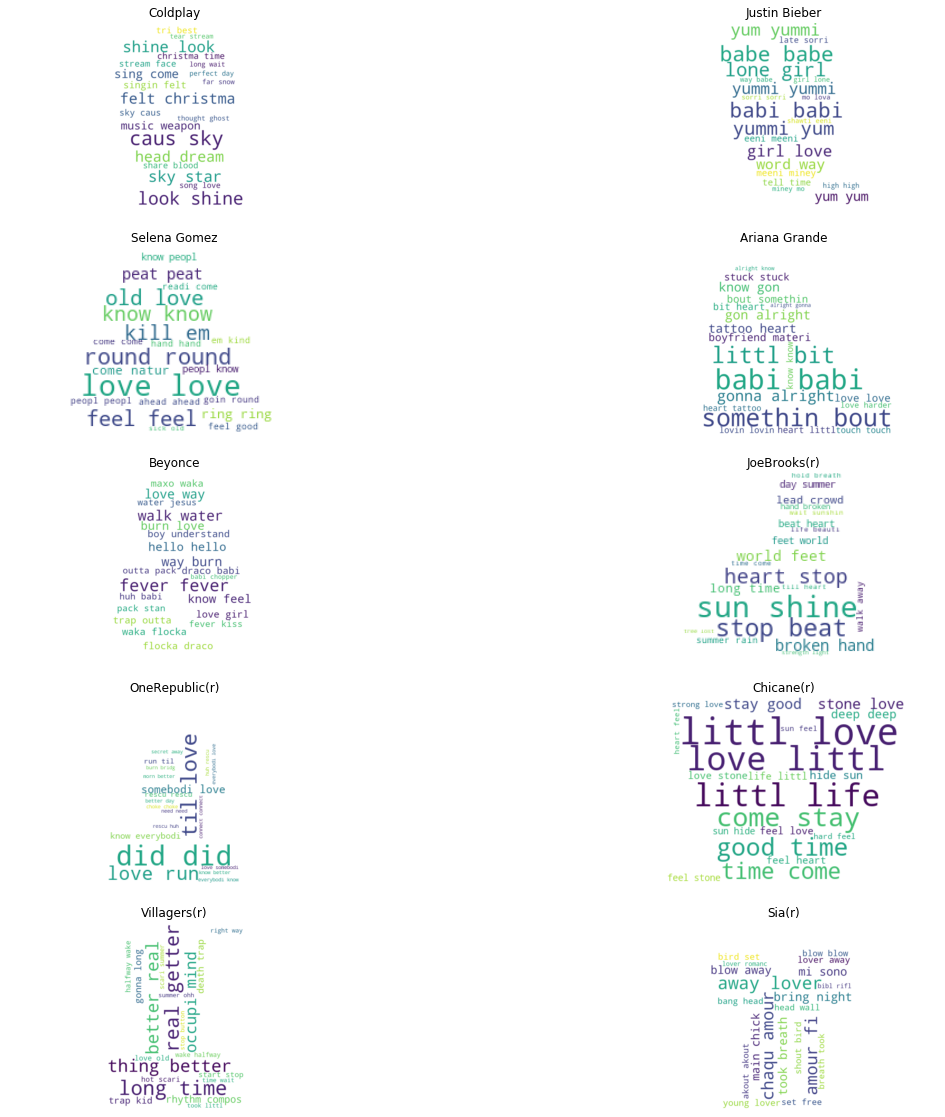

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

Artist = ['Coldplay','Justin Bieber','Selena Gomez', 'Ariana Grande','Beyonce','JoeBrooks(r)','OneRepublic(r)',
                  'Chicane(r)',"Villagers(r)", "Sia(r)"]

for idx,name in enumerate(Artist):
    mask = np.array(Image.open('/Users/ruiwenzhang/ThridSemester/capstone/' + name + '.jpg'))
    wc = WordCloud(stopwords=stop_words_bi,
               mask=mask, background_color="white",
               max_words=2000, random_state=42, width=mask.shape[1],
               height=mask.shape[0])
    wc.generate_from_frequencies(dict(top_dict_bi[name]))
    plt.subplot(5,2,idx+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(Artist[idx])

plt.show();


#### 2.6 Findings

1. Bigram makes more sense of the text, I can easily see the themetic difference from each artist. Coldplay's lyrics and JoeBrooks' as well as Villagers' share similar theme.
2. Coldplay like to use words like "head dreams", "sky stars", "try young" etc. which are interesting to me, because I'm more into inspiring stuff instead of love songs.

### 2.7 Sentiment Analysis

About Textblob:
1. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
2. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

In [30]:
from textblob import TextBlob
df_lyrics['polarity'] = df_lyrics.lyrics.apply(lambda x: TextBlob(x).sentiment.polarity)
df_lyrics['subjectivity'] = df_lyrics.lyrics.apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_lyrics

,lyrics,polarity,subjectivity
Artist,,,
Justin Bieber,angri honesti know tri apolog hope run time refere caus just need shot forgiv know know mistak mayb twice twice mean mayb coupl time redeem redeem...,0.130685,0.564353
Coldplay,gone mile far snow came colder day day miss hear children singin felt christma time frozen silent night dream appear outsid purpl sky diamond snow...,0.158892,0.534934
Selena Gomez,readi come readi come worri open invit sittin right real patient day night waitin standbi stop love hate way love day night mayb addict life lie s...,0.220923,0.565228
JoeBrooks(r),hold eye morn sunshin bright blind fear away time stall mind way caus heart beat need bare feet fall wave sand mile mile common tone endless night...,0.052294,0.504016
OneRepublic(r),guess suppos feel talk talk talk anymor guess suppos sound univers univers univers torn live live half day live life day stop think think anymor o...,0.223959,0.548912
Chicane(r),hold good slip away return think power stay ground midnight way home tie forev til wrist drip blood room cut rope drift night contain urg run need...,0.246723,0.549327
Ariana Grande,orbit know hard import love fall knee tell know better bark tree just fall leav nah just watch smoke drink pre steer clear headach start honest bo...,0.178080,0.504748
Beyonce,boy understand best woman chang chill guy start complain constant accus cheat jelous boy understand feel love girl know feel know feel lose love l...,0.124912,0.547290
Villagers(r),scuse die million time meet eye promis leav shelf hook blame yes blame scuse tri somebodi decid come ove place heart begin swell forget wear face ...,0.171007,0.543839


Text(0, 10, 'Justin Bieber')

Text(0, 10, 'Coldplay')

Text(0, 10, 'Selena Gomez')

Text(0, 10, 'JoeBrooks(r)')

Text(0, 10, 'OneRepublic(r)')

Text(0, 10, 'Chicane(r)')

Text(0, 10, 'Ariana Grande')

Text(0, 10, 'Beyonce')

Text(0, 10, 'Villagers(r)')

Text(0, 10, 'Sia(r)')

Text(0.5, 1.0, 'Sentiment Scores (-1,1)')

Text(0.5, 0, 'Negative--------Positive')

Text(0, 0.5, 'Facts-------Opinionated')

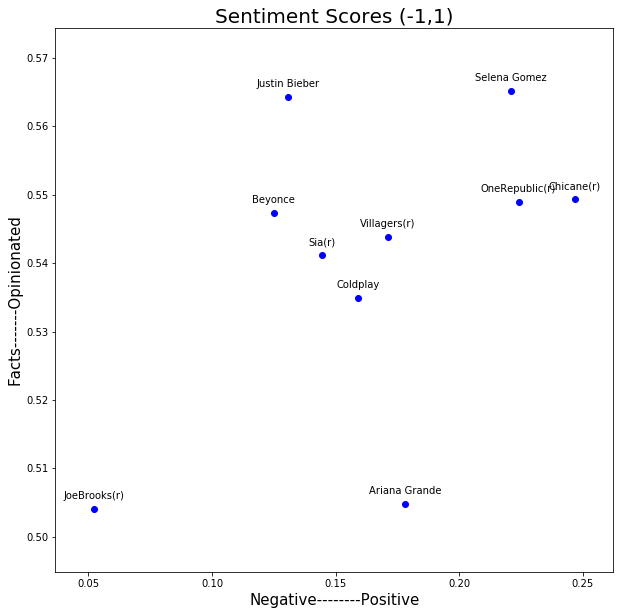

In [32]:
x = df_lyrics.polarity
y = df_lyrics.subjectivity
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'blue')

plt.rcParams['figure.figsize'] = [20, 20]

for i, name in enumerate(df_lyrics.index):
    plt.annotate(name,
                 (x[i],y[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center)

plt.title("Sentiment Scores (-1,1)", fontsize = 20)
plt.xlabel("Negative--------Positive", fontsize = 15)
plt.ylabel("Facts-------Opinionated", fontsize = 15)
plt.show()

#### 2.7 Findings

1. There is not much difference of sentiment score in their lyrics, while Coldplay and JoeBrooks are the less opinionated.

# 3. Topic Modeling

### 3.1 LDA

In LDA, each document is viewed as a mixture of various topics. That is for each document we get the probability of the document belonging to each topic. The probability sums to 1.

Similarly each topic is be viewed as a mixture of various terms(words). That is for each topic we get the probability of each word belonging to the topic. The probability sums to 1. Hence for every word topic combination there is a probability assigned. The code terms(om1) gets the word with the highest probability for each topic.

In [38]:
data_lda = pd.read_csv(os.getcwd()+'/df_dtm.csv',index_col=0)

In [4]:
data_lda

,abandon,abl,aboutif,academia,academiayaaaaa,accept,accomplish,accus,aceptami,ach,...,youth,youtoday,youw,youyou,yum,yummi,yup,zip,zipper,zone
Artist,,,,,,,,,,,,,,,,,,,,,
Justin Bieber,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,56,70,0,0,0,0
Coldplay,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Selena Gomez,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
JoeBrooks(r),0,0,0,0,0,2,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
OneRepublic(r),0,2,0,0,0,0,0,0,0,1,...,2,1,0,1,0,0,0,0,0,0
Chicane(r),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ariana Grande,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,3
Beyonce,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
Villagers(r),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# conda install -c anaconda gensim
# conda install smart_open==2.0.0
from gensim import matutils, models
import scipy.sparse

# term_document matrix is one of the required inputs
lda_tdm = data_lda.transpose()
lda_tdm

Artist,Justin Bieber,Coldplay,Selena Gomez,JoeBrooks(r),OneRepublic(r),Chicane(r),Ariana Grande,Beyonce,Villagers(r),Sia(r)
abandon,0,0,0,0,0,0,0,1,0,0
abl,0,0,0,0,2,0,0,0,0,0
aboutif,0,0,0,0,0,1,0,0,0,0
academia,0,0,0,0,0,0,0,0,0,3
academiayaaaaa,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
yummi,70,0,0,0,0,0,0,0,0,0
yup,0,0,0,0,0,0,2,0,0,0
zip,0,0,0,0,0,0,1,0,0,1
zipper,0,0,1,0,0,0,0,0,0,0


In [17]:
# Make the term_document matrix a new gensim format--sparse matrix, from pandas dataframe
sparse_counts = scipy.sparse.csr_matrix(lda_tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# vectorizer = CountVectorizer(stop_words = stop_words)
# X = vectorizer.fit_transform(df_lyrics.lyrics)
id2word = dict((v,k) for (k,v) in vectorizer.vocabulary_.items())

#### Gensim can figure out these topics contains these words, but we have to figure out what these topics are.

In [13]:
lda = models.LdaModel(corpus = corpus, id2word = id2word, num_topics = 5, passes = 200)
lda.print_topics()

[(0,
  '0.000*"cuz wrong" + 0.000*"complet focus" + 0.000*"dagger rout" + 0.000*"compar babi" + 0.000*"diva tell" + 0.000*"attir burn" + 0.000*"chang hook" + 0.000*"cd gaze" + 0.000*"bleed heart" + 0.000*"born thunderstorm"'),
 (1,
  '0.000*"cuz wrong" + 0.000*"complet focus" + 0.000*"dagger rout" + 0.000*"compar babi" + 0.000*"diva tell" + 0.000*"attir burn" + 0.000*"chang hook" + 0.000*"cd gaze" + 0.000*"bleed heart" + 0.000*"born thunderstorm"'),
 (2,
  '0.026*"carat mida" + 0.014*"alright midnight" + 0.014*"deep close" + 0.012*"bite dust" + 0.010*"babi joke" + 0.010*"distanc need" + 0.009*"center deni" + 0.009*"braid bangin" + 0.007*"came came" + 0.007*"bought bridg"'),
 (3,
  '0.000*"cuz wrong" + 0.000*"complet focus" + 0.000*"dagger rout" + 0.000*"compar babi" + 0.000*"diva tell" + 0.000*"attir burn" + 0.000*"chang hook" + 0.000*"cd gaze" + 0.000*"bleed heart" + 0.000*"born thunderstorm"'),
 (4,
  '0.015*"carat mida" + 0.008*"bought hair" + 0.008*"alright caus" + 0.007*"babi joke

## 3.2 LDA Modeling with only Nouns

In [22]:
from nltk import word_tokenize, pos_tag
import nltk
# nltk.download('averaged_perceptron_tagger') pos_tag library

def nouns(text):
    tokenized = TweetTokenizer().tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if pos=='NN']
    return " ".join(all_nouns)

df_nouns = pd.DataFrame(df_lyrics.lyrics.apply(nouns))

In [23]:
vectorizern = CountVectorizer(stop_words = stop_words)
X = vectorizern.fit_transform(df_nouns.lyrics)
df_dtmn = pd.DataFrame(X.toarray(), columns = vectorizern.get_feature_names(), 
                      index = df_nouns.index)

# New Document term Matrix without new stop words
df_dtmn 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['chicane', 'joebrooks', 'onerepublic', 'sia', 'villagers'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,academia,academiayaaaaa,accept,accus,aceptami,ach,achill,ack,acquir,act,...,yourselfand,youstep,youth,youyou,yum,yummi,yup,zip,zipper,zone
Artist,,,,,,,,,,,,,,,,,,,,,
Justin Bieber,0,0,0,0,0,0,0,0,0,3,...,1,0,0,0,54,68,0,0,0,0
Coldplay,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Selena Gomez,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
JoeBrooks(r),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OneRepublic(r),0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Chicane(r),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ariana Grande,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,1,0,1
Beyonce,0,0,0,1,0,0,0,1,0,3,...,0,0,1,0,0,0,0,0,0,0
Villagers(r),0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# term_document matrix is one of the required inputs
lda_tdmn = df_dtmn.transpose()
# Make the term_document matrix a new gensim format, sparse matrix
sparse_countsn = scipy.sparse.csr_matrix(lda_tdmn)
corpusn = matutils.Sparse2Corpus(sparse_countsn)

id2wordn = dict((v,k) for (k,v) in vectorizern.vocabulary_.items())

In [21]:
ldan = models.LdaModel(corpus = corpusn, id2word = id2wordn, num_topics = 5, passes = 200)
ldan.print_topics()

[(0,
  '0.020*"time" + 0.020*"heart" + 0.015*"world" + 0.012*"caus" + 0.010*"dream" + 0.010*"life" + 0.010*"thing" + 0.009*"day" + 0.009*"gon" + 0.009*"eye"'),
 (1,
  '0.000*"grow" + 0.000*"castl" + 0.000*"cool" + 0.000*"air" + 0.000*"wonder" + 0.000*"juic" + 0.000*"war" + 0.000*"sand" + 0.000*"flame" + 0.000*"minut"'),
 (2,
  '0.038*"love" + 0.021*"round" + 0.018*"babi" + 0.015*"kind" + 0.015*"peopl" + 0.015*"heart" + 0.012*"way" + 0.011*"tri" + 0.011*"place" + 0.011*"look"'),
 (3,
  '0.021*"time" + 0.021*"love" + 0.017*"feel" + 0.015*"life" + 0.014*"thing" + 0.012*"way" + 0.012*"heart" + 0.011*"day" + 0.009*"sun" + 0.009*"night"'),
 (4,
  '0.041*"babi" + 0.026*"time" + 0.021*"girl" + 0.021*"gon" + 0.020*"way" + 0.018*"love" + 0.018*"heart" + 0.016*"caus" + 0.012*"yummi" + 0.010*"babe"')]

## 3.3 LDA Modeling with nouns and adjectives

In [24]:
def nouns(text):
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if pos=='NN' or pos =='JJ']
    return " ".join(all_nouns)

df_nounsj = pd.DataFrame(df_lyrics.lyrics.apply(nouns))


In [28]:
vectorizernj = CountVectorizer(stop_words = stop_words)
X = vectorizernj.fit_transform(df_nounsj.lyrics)
df_dtmnj = pd.DataFrame(X.toarray(), columns = vectorizernj.get_feature_names(), 
                      index = df_nounsj.index)

# New Document term Matrix without new stop words
df_dtmnj 

,aboutif,academia,academiayaaaaa,accept,accomplish,accus,aceptami,ach,achill,ack,...,youstep,youth,youw,youyou,yum,yummi,yup,zip,zipper,zone
Artist,,,,,,,,,,,,,,,,,,,,,
Justin Bieber,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,56,68,0,0,0,0
Coldplay,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Selena Gomez,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
JoeBrooks(r),0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
OneRepublic(r),0,0,0,0,0,0,0,0,0,0,...,1,2,0,1,0,0,0,0,0,0
Chicane(r),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ariana Grande,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,1
Beyonce,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
Villagers(r),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# term_document matrix is one of the required inputs
lda_tdmnj = df_dtmnj.transpose()
# Make the term_document matrix a new gensim format, sparse matrix
sparse_countsnj = scipy.sparse.csr_matrix(lda_tdmnj)
corpusnj = matutils.Sparse2Corpus(sparse_countsnj)

id2wordnj = dict((v,k) for (k,v) in vectorizernj.vocabulary_.items())

In [31]:
ldanj = models.LdaModel(corpus = corpusnj, id2word = id2wordnj, num_topics = 5, passes = 200)
ldanj.print_topics()

[(0,
  '0.016*"time" + 0.016*"thing" + 0.013*"love" + 0.011*"feel" + 0.010*"light" + 0.008*"day" + 0.008*"way" + 0.007*"rescu" + 0.007*"world" + 0.007*"old"'),
 (1,
  '0.032*"girl" + 0.022*"time" + 0.021*"babi" + 0.019*"yummi" + 0.016*"way" + 0.015*"yum" + 0.013*"babe" + 0.012*"heart" + 0.012*"love" + 0.009*"sorri"'),
 (2,
  '0.036*"babi" + 0.026*"love" + 0.020*"gon" + 0.016*"heart" + 0.013*"time" + 0.012*"good" + 0.011*"way" + 0.011*"littl" + 0.010*"alright" + 0.009*"round"'),
 (3,
  '0.013*"heart" + 0.011*"time" + 0.009*"light" + 0.009*"life" + 0.007*"day" + 0.007*"breath" + 0.007*"night" + 0.007*"world" + 0.007*"love" + 0.006*"look"'),
 (4,
  '0.019*"time" + 0.019*"littl" + 0.017*"feel" + 0.017*"love" + 0.016*"way" + 0.016*"life" + 0.012*"sun" + 0.012*"good" + 0.011*"fever" + 0.009*"heart"')]

## 3.4 Pick the model makes more sense and Find the Best number of topics

In [50]:
# Create a list of the topic numbers we want to try
topic_nums_lda = list(np.arange(2, 40+1, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores_lda = []

for num in topic_nums_lda:
    ldanj = models.LdaModel(
        corpus = corpusnj,
        id2word = id2wordnj,
        num_topics = num,
        passes = 100
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=ldanj,
        corpus = corpusnj,
        coherence='u_mass'
    )
    
    coherence_scores_lda.append(round(cm.get_coherence(), 5))

In [52]:
scores_lda = list(zip(coherence_scores_lda,topic_nums_lda))
scores_lda_best = sorted(scores_lda, key = itemgetter(0), reverse = True)
scores_lda_best

[(-0.1836, 32),
 (-0.18691, 19),
 (-0.19419, 36),
 (-0.19829, 30),
 (-0.20238, 27),
 (-0.20337, 22),
 (-0.2043, 24),
 (-0.20499, 28),
 (-0.20726, 3),
 (-0.20963, 25),
 (-0.21136, 34),
 (-0.21263, 38),
 (-0.21476, 29),
 (-0.2152, 16),
 (-0.21641, 10),
 (-0.22134, 35),
 (-0.23181, 40),
 (-0.2324, 8),
 (-0.23793, 11),
 (-0.23799, 37),
 (-0.2404, 18),
 (-0.24095, 39),
 (-0.24192, 31),
 (-0.24195, 21),
 (-0.24231, 20),
 (-0.24501, 14),
 (-0.2452, 26),
 (-0.24553, 23),
 (-0.25249, 13),
 (-0.25372, 15),
 (-0.26162, 12),
 (-0.27292, 17),
 (-0.30077, 2),
 (-0.32213, 7),
 (-0.32612, 6),
 (-0.32833, 9),
 (-0.3372, 4),
 (-0.35191, 33),
 (-0.54235, 5)]

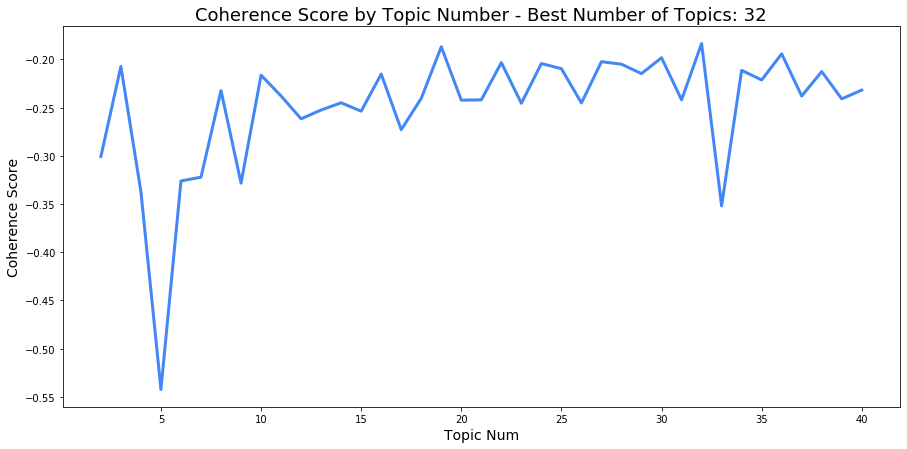

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the results
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(
    topic_nums_lda,
    coherence_scores_lda,
    linewidth=3,
    color='#4287f5'
)

ax.set_xlabel("Topic Num", fontsize=14)
ax.set_ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(scores_lda_best[0][1]), fontsize=18)
# plt.xticks(np.arange(3, max(topic_nums_lda) + 1, 1), fontsize=12)
# plt.yticks(fontsize=12)

plt.show()

## Pick the Best Model

1. For number 3, number 19, number 32, the scores are similar, so I decided to pick 3 for easier processing.

In [82]:
ldanj = models.LdaModel(corpus = corpusnj, id2word = id2wordnj, num_topics = 3, passes = 300)
ldanj.print_topics()

[(0,
  '0.011*"thing" + 0.010*"light" + 0.010*"love" + 0.010*"time" + 0.009*"day" + 0.008*"heart" + 0.007*"world" + 0.007*"life" + 0.006*"night" + 0.006*"feel"'),
 (1,
  '0.022*"love" + 0.012*"good" + 0.011*"time" + 0.010*"kind" + 0.010*"round" + 0.009*"feel" + 0.009*"babi" + 0.009*"peopl" + 0.009*"way" + 0.008*"heart"'),
 (2,
  '0.026*"babi" + 0.022*"time" + 0.016*"way" + 0.015*"love" + 0.015*"heart" + 0.014*"girl" + 0.013*"gon" + 0.012*"littl" + 0.008*"feel" + 0.007*"life"')]

#### Settle three five topics:

` Topic 0: Light, World
 Topic 1: Love, Life
 Topic 2: Girl, Love
`

In [399]:
def num_topic(num):
    if num == 0:
        return 'LDA 0: Light, World'
    if num == 1:
        return 'LDA 1: Love, Life'
    if num == 2:
        return 'LDA 2: Girl, Love'
  
topicnj = list()
for i in ldanj[corpusnj]:
    if len(i)>1:
        t = []
        for j in i:
            t.append(j[0])
        topicnj.append(t)
    else:
        topicnj.append(i[0][0])
        
list(zip([a for a in topicnj], df_dtmnj.index))

[(2, 'Justin Bieber'),
 (0, 'Coldplay'),
 (1, 'Selena Gomez'),
 ([0, 2], 'JoeBrooks(r)'),
 (0, 'OneRepublic(r)'),
 (2, 'Chicane(r)'),
 (2, 'Ariana Grande'),
 (2, 'Beyonce'),
 (1, 'Villagers(r)'),
 (0, 'Sia(r)')]

In [402]:
df_lyrics['LDA'] = topicnj
df_lyrics['LDA'] = df_lyrics['LDA'].apply(lambda x:[num_topic(xx) for xx in x] if len(str(x))>1 else num_topic(x))

In [403]:
df_lyrics

,lyrics,LDA,NMF
Artist,,,
Justin Bieber,angri honesti know tri apolog hope run time refere caus just need shot forgiv know know mistak mayb twice twice mean mayb coupl time redeem redeem...,"LDA 2: Girl, Love",1
Coldplay,gone mile far snow came colder day day miss hear children singin felt christma time frozen silent night dream appear outsid purpl sky diamond snow...,"LDA 0: Light, World",0
Selena Gomez,readi come readi come worri open invit sittin right real patient day night waitin standbi stop love hate way love day night mayb addict life lie s...,"LDA 1: Love, Life",4
JoeBrooks(r),hold eye morn sunshin bright blind fear away time stall mind way caus heart beat need bare feet fall wave sand mile mile common tone endless night...,"[LDA 0: Light, World, LDA 2: Girl, Love]",2
OneRepublic(r),guess suppos feel talk talk talk anymor guess suppos sound univers univers univers torn live live half day live life day stop think think anymor o...,"LDA 0: Light, World",0
Chicane(r),hold good slip away return think power stay ground midnight way home tie forev til wrist drip blood room cut rope drift night contain urg run need...,"LDA 2: Girl, Love",2
Ariana Grande,orbit know hard import love fall knee tell know better bark tree just fall leav nah just watch smoke drink pre steer clear headach start honest bo...,"LDA 2: Girl, Love",1
Beyonce,boy understand best woman chang chill guy start complain constant accus cheat jelous boy understand feel love girl know feel know feel lose love l...,"LDA 2: Girl, Love",3
Villagers(r),scuse die million time meet eye promis leav shelf hook blame yes blame scuse tri somebodi decid come ove place heart begin swell forget wear face ...,"LDA 1: Love, Life",0


#### Summary:
1. Based on LDA, I think I should try out  "OneRepublic", "Sia" as well as "JobBrooks".
2. The music recommendation systerm of Spotify works well considering lyrics.

## 4. Non-Matrix Factorization

In [67]:
df_lyrics

,lyrics
Artist,
Justin Bieber,angri honesti know tri apolog hope run time refere caus just need shot forgiv know know mistak mayb twice twice mean mayb coupl time redeem redeem...
Coldplay,gone mile far snow came colder day day miss hear children singin felt christma time frozen silent night dream appear outsid purpl sky diamond snow...
Selena Gomez,readi come readi come worri open invit sittin right real patient day night waitin standbi stop love hate way love day night mayb addict life lie s...
JoeBrooks(r),hold eye morn sunshin bright blind fear away time stall mind way caus heart beat need bare feet fall wave sand mile mile common tone endless night...
OneRepublic(r),guess suppos feel talk talk talk anymor guess suppos sound univers univers univers torn live live half day live life day stop think think anymor o...
Chicane(r),hold good slip away return think power stay ground midnight way home tie forev til wrist drip blood room cut rope drift night contain urg run need...
Ariana Grande,orbit know hard import love fall knee tell know better bark tree just fall leav nah just watch smoke drink pre steer clear headach start honest bo...
Beyonce,boy understand best woman chang chill guy start complain constant accus cheat jelous boy understand feel love girl know feel know feel lose love l...
Villagers(r),scuse die million time meet eye promis leav shelf hook blame yes blame scuse tri somebodi decid come ove place heart begin swell forget wear face ...


In [94]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from operator import itemgetter

### 4.1 Use Gensim's NMF to get the best num of topics via coherence score

In [95]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df_lyrics['lyrics'].apply(lambda x:x.split())
texts = texts.values.tolist()

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

In [96]:
# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

In [103]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(4, 40+1, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        kappa=.1,                 # Gradient Descent step size
        minimum_probability=0.01,
        w_max_iter=200,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='u_mass'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

In [106]:
scores = list(zip(topic_nums, coherence_scores))
best_n_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

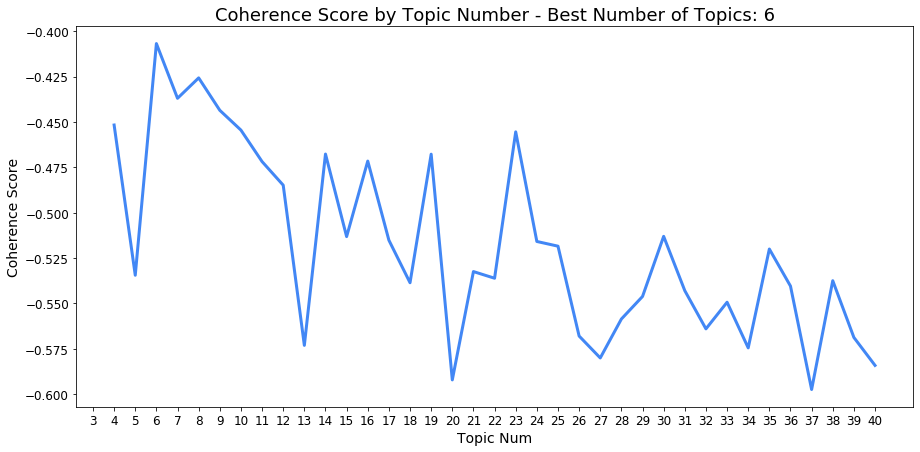

In [105]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_n_topics), fontsize=18)
plt.xticks(np.arange(3, max(topic_nums) + 1, 1), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### 4.2 Use the number of topics with the highest coherence score to run the sklearn nmf model

### tf–idf or TFIDF
1. In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.[1] It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.

2. Works better than bag of words or word2vec for my case.

3. We can get it through sklearn.

In [388]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df_lyrics['lyrics'].apply(lambda x:x.split())

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=3000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=6,
    init='nndsvda',#'nndsvd',             # ‘nndsvd’: Nonnegative Double Singular Value Decomposition (NNDSVD). 
    max_iter=500,                        # initialization (better for sparseness)
    l1_ratio=1,                         # 0 means l2, 1 means l1, 0-1 means l1+l2
    solver='mu',                       # Numerical solver to use: ‘cd’ is a Coordinate Descent solver. ‘mu’ is a Multiplicative Update solver. Numerical solver to use: ‘cd’ is a Coordinate Descent solver. ‘mu’ is a Multiplicative Update solver.
    alpha=0.01,                       # Constant that multiplies the regularization terms. Set it to zero to have no regularization.
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [404]:
# Showing the 3 matrices we get witn nmf
A = tfidf_vectorizer.transform(texts) # Compressed Sparse Row format saves space and time complexities
W = nmf.components_
H = nmf.transform(A)

print('A = {} x {}'.format(A.shape[0], A.shape[1]))
print('W = {} x {}'.format(W.shape[0], W.shape[1]))
print('H = {} x {}'.format(H.shape[0], H.shape[1]))

A = 10 x 852
W = 6 x 852
H = 10 x 6


In [390]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

n_top_words = 8
top_words_idx = list()
for topic_idx,topic in enumerate(nmf.components_):
    top_words_idx.append(topic.argsort()[:-n_top_words - 1:-1]) # argsort() Returns the indices that would sort an array.

In [391]:
top_words_idx

[array([ 40, 584, 408, 734, 197, 673, 668,  69]),
 array([ 24,  25,  11,  65, 669, 672,  62, 434]),
 array([705, 688, 707, 747, 283, 231, 791, 161]),
 array([233,  46, 312, 259, 638, 511, 328, 324]),
 array([525, 600, 221, 359, 543, 526, 590, 192]),
 array([ 53, 433,  67, 313,  10, 453, 760,  72])]

In [392]:
topics = {}
for idx,j in enumerate(top_words_idx):
    topics[idx] = [tfidf_fn[i] for i in j]
topic_df = pd.DataFrame(topics).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: ' '.join(x), axis=1)
topic_df

,0,1,2,3,4,5,6,7,topics
0,better,rescu,long time,thing better,everybodi,soul,somebodi,bridg,better rescu long time thing better everybodi soul somebodi bridg
1,babe,babi babi,alright,boyfriend,somethin,sorri,bout,lovin,babe babi babi alright boyfriend somethin sorri bout lovin
2,sun,stone,sun shine,time come,good time,feet,walk away,deep,sun stone sun shine time come good time feet walk away deep
3,fever,bitch,hello,fuck,shit,pack,huh,hook,fever bitch hello fuck shit pack huh hook
4,peopl,round,feel feel,kind,pre,peopl know,ring,em,peopl round feel feel kind pre peopl know ring em
5,blow,lover,breath,higher,aliv,mi,tonight,bring,blow lover breath higher aliv mi tonight bring


### Summarize these topics

`Topic 0: better, soul
 Topic 1: love, boyfriend
 Topic 2: sun, time
 Topic 3: profanity
 Topic 4: people, kind
 Topic 5: love
`


In [394]:
topicweights = nmf.transform(tfidf)
list(zip(topicweights.argmax(axis=1),df_lyrics.index))

[(1, 'Justin Bieber'),
 (0, 'Coldplay'),
 (4, 'Selena Gomez'),
 (2, 'JoeBrooks(r)'),
 (0, 'OneRepublic(r)'),
 (2, 'Chicane(r)'),
 (1, 'Ariana Grande'),
 (3, 'Beyonce'),
 (0, 'Villagers(r)'),
 (5, 'Sia(r)')]

In [395]:
df_lyrics['NMF'] = topicweights.argmax(axis=1)
df_lyrics

,lyrics,LDA,NMF
Artist,,,
Justin Bieber,angri honesti know tri apolog hope run time refere caus just need shot forgiv know know mistak mayb twice twice mean mayb coupl time redeem redeem...,"Topic 2: Girl, Love",1
Coldplay,gone mile far snow came colder day day miss hear children singin felt christma time frozen silent night dream appear outsid purpl sky diamond snow...,"Topic 0: Light, World",0
Selena Gomez,readi come readi come worri open invit sittin right real patient day night waitin standbi stop love hate way love day night mayb addict life lie s...,"Topic 1: Love, Life",4
JoeBrooks(r),hold eye morn sunshin bright blind fear away time stall mind way caus heart beat need bare feet fall wave sand mile mile common tone endless night...,"[Topic 0: Light, World, Topic 2: Girl, Love]",2
OneRepublic(r),guess suppos feel talk talk talk anymor guess suppos sound univers univers univers torn live live half day live life day stop think think anymor o...,"Topic 0: Light, World",0
Chicane(r),hold good slip away return think power stay ground midnight way home tie forev til wrist drip blood room cut rope drift night contain urg run need...,"Topic 2: Girl, Love",2
Ariana Grande,orbit know hard import love fall knee tell know better bark tree just fall leav nah just watch smoke drink pre steer clear headach start honest bo...,"Topic 2: Girl, Love",1
Beyonce,boy understand best woman chang chill guy start complain constant accus cheat jelous boy understand feel love girl know feel know feel lose love l...,"Topic 2: Girl, Love",3
Villagers(r),scuse die million time meet eye promis leav shelf hook blame yes blame scuse tri somebodi decid come ove place heart begin swell forget wear face ...,"Topic 1: Love, Life",0


In [407]:
df_lyrics.to_csv(os.getcwd()+ "/df_lyrics.csv")

## 5. Bert + LDA and Clustering

Latent Dirichlet Allocation (LDA) probabilistic topic assignment and pre-trained sentence embeddings from BERT.


Insired by:

Shoa, S. (2020). Contextual Topic Identification: Identifying meaningful topics for sparse Steam reviews. Medium. Available at: https://blog.insightdatascience.com/contextual-topic-identification-4291d256a032 [Accessed 25 Mar. 2020].

In [5]:
df_lyrics = pd.read_csv(os.getcwd()+ "/df_lyrics.csv", index_col = 0)
df_lyrics

,lyrics,LDA,NMF
Artist,,,
Justin Bieber,angri honesti know tri apolog hope run time refere caus just need shot forgiv know know mistak mayb twice twice mean mayb coupl time redeem redeem...,"LDA 2: Girl, Love",1
Coldplay,gone mile far snow came colder day day miss hear children singin felt christma time frozen silent night dream appear outsid purpl sky diamond snow...,"LDA 0: Light, World",0
Selena Gomez,readi come readi come worri open invit sittin right real patient day night waitin standbi stop love hate way love day night mayb addict life lie s...,"LDA 1: Love, Life",4
JoeBrooks(r),hold eye morn sunshin bright blind fear away time stall mind way caus heart beat need bare feet fall wave sand mile mile common tone endless night...,"['LDA 0: Light, World', 'LDA 2: Girl, Love']",2
OneRepublic(r),guess suppos feel talk talk talk anymor guess suppos sound univers univers univers torn live live half day live life day stop think think anymor o...,"LDA 0: Light, World",0
Chicane(r),hold good slip away return think power stay ground midnight way home tie forev til wrist drip blood room cut rope drift night contain urg run need...,"LDA 2: Girl, Love",2
Ariana Grande,orbit know hard import love fall knee tell know better bark tree just fall leav nah just watch smoke drink pre steer clear headach start honest bo...,"LDA 2: Girl, Love",1
Beyonce,boy understand best woman chang chill guy start complain constant accus cheat jelous boy understand feel love girl know feel know feel lose love l...,"LDA 2: Girl, Love",3
Villagers(r),scuse die million time meet eye promis leav shelf hook blame yes blame scuse tri somebodi decid come ove place heart begin swell forget wear face ...,"LDA 1: Love, Life",0


### 5.1 Get the LDA vector representation (probabilistic topic assignments for all documents)

In [11]:
from nltk import word_tokenize, pos_tag
import nltk

def nouns(text):
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if pos=='NN' or pos =='JJ']
    return " ".join(all_nouns)

df_nounsj = pd.DataFrame(df_lyrics.lyrics.apply(nouns))

from gensim.corpora.dictionary import Dictionary
from gensim import matutils, models

texts = df_nounsj['lyrics'].apply(lambda x:x.split())
texts = texts.values.tolist()

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionarynj = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionarynj.filter_extremes(
    no_below=3,
    no_above=0.85,
)

# Create the bag-of-words format (list of (token_id, token_count))
corpusnj = [dictionarynj.doc2bow(text) for text in texts]


ldanj = models.LdaModel(corpus = corpusnj, id2word = dictionarynj, num_topics = 6, passes = 200)
ldanj.print_topics()

[(0,
  '0.015*"breath" + 0.012*"fever" + 0.011*"rescu" + 0.010*"right" + 0.010*"somebodi" + 0.010*"sun" + 0.010*"whoa" + 0.009*"bridg" + 0.009*"aliv" + 0.009*"tonight"'),
 (1,
  '0.026*"babe" + 0.024*"alright" + 0.022*"boy" + 0.022*"right" + 0.020*"somethin" + 0.018*"lovin" + 0.016*"bad" + 0.016*"touch" + 0.015*"pre" + 0.015*"favorit"'),
 (2,
  '0.032*"sun" + 0.015*"turn" + 0.015*"stone" + 0.013*"sky" + 0.013*"hide" + 0.012*"deep" + 0.011*"long" + 0.011*"true" + 0.011*"beat" + 0.011*"summer"'),
 (3,
  '0.002*"speak" + 0.002*"hous" + 0.002*"cheat" + 0.002*"shirt" + 0.002*"heaven" + 0.002*"jealous" + 0.002*"mad" + 0.002*"crowd" + 0.002*"mr" + 0.002*"mark"'),
 (4,
  '0.043*"round" + 0.035*"peopl" + 0.031*"kind" + 0.021*"pre" + 0.016*"bridg" + 0.015*"danc" + 0.015*"sick" + 0.014*"trust" + 0.013*"sin" + 0.013*"goin"'),
 (5,
  '0.021*"real" + 0.020*"kind" + 0.018*"bodi" + 0.018*"long" + 0.017*"guess" + 0.017*"soul" + 0.014*"piec" + 0.014*"free" + 0.013*"throw" + 0.012*"trap"')]

In [9]:
def get_vec_lda(model, corpus, k):
    """
    Get the LDA vector representation (probabilistic topic assignments for all documents)
    :return: vec_lda with dimension: (n_doc * n_topic)
    """
    n_doc = len(corpus)
    vec_lda = np.zeros((n_doc, k))
    for i in range(n_doc):
        # get the distribution for the i-th document in corpus
        for topic, prob in model.get_document_topics(corpus[i]):
            vec_lda[i, topic] = prob
            
    return vec_lda

In [16]:
vec_lda = get_vec_lda(ldanj,corpusnj,6)
vec_lda

array([[0.        , 0.99928761, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.99853528, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.99920976,
        0.        ],
       [0.        , 0.        , 0.99821007, 0.        , 0.        ,
        0.        ],
       [0.99911273, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.99817091, 0.        , 0.        ,
        0.        ],
       [0.13985737, 0.85959762, 0.        , 0.        , 0.        ,
        0.        ],
       [0.68137896, 0.29458547, 0.        , 0.        , 0.02293853,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.99877745],
       [0.99911046, 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

### 5.2 Get sentence embeddings from Bert

In [22]:
#!pip install sentence-transformers

In [24]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-max-tokens')

In [33]:
bert_vec = np.array(model.encode(df_lyrics['lyrics'].values.tolist(), show_progress_bar=True))
print('Getting vector representations for BERT. Done!')


Getting vector representations for BERT. Done!


### 5.3 combine vector_lda and vector_bert

In [41]:
gamma = 15  # parameter for reletive importance of lda
vec_ldabert = np.c_[vec_lda * gamma, bert_vec]

In [47]:
import pickle
with open(os.getcwd() + 'vec_ldabert.pickle', 'wb') as f:
    pickle.dump(vec_ldabert, f)

In [6]:
import os
import pickle
with open(os.getcwd() + 'vec_ldabert.pickle', 'rb') as f:
    vec_ldabert = pickle.load(f)

### 5.4 Learning latent space representation of combined vector through Autoencoder

In [1]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


class Autoencoder:
    """
    Autoencoder for learning latent space representation
    architecture simplified for only one hidden layer
    """

    def __init__(self, latent_dim=32, activation='relu', epochs=200, batch_size=128):
        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.his = None

    def _compile(self, input_dim):
        """
        compile the computational graph
        """
        input_vec = Input(shape=(input_dim,))
        encoded = Dense(self.latent_dim, activation=self.activation)(input_vec)
        decoded = Dense(input_dim, activation=self.activation)(encoded)
        self.autoencoder = Model(input_vec, decoded)
        self.encoder = Model(input_vec, encoded)
        encoded_input = Input(shape=(self.latent_dim,))
        decoder_layer = self.autoencoder.layers[-1]
        self.decoder = Model(encoded_input, self.autoencoder.layers[-1](encoded_input))
        self.autoencoder.compile(optimizer='adam', loss=keras.losses.mean_squared_error)

    def fit(self, X):
        if not self.autoencoder:
            self._compile(X.shape[1])
        X_train, X_test = train_test_split(X)
        self.his = self.autoencoder.fit(X_train, X_train,
                                        epochs=200,
                                        batch_size=128,
                                        shuffle=True,
                                        validation_data=(X_test, X_test), verbose=0)

Using TensorFlow backend.
/Users/ruiwenzhang/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ruiwenzhang/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ruiwenzhang/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

In [10]:
AE = Autoencoder()
print('Fitting Autoencoder ...')
AE.fit(vec_ldabert)
print('Fitting Autoencoder Done!')
vec = AE.encoder.predict(vec_ldabert)
vec

W0811 13:00:12.092295 4401323456 deprecation_wrapper.py:119] From /Users/ruiwenzhang/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 13:00:12.108212 4401323456 deprecation_wrapper.py:119] From /Users/ruiwenzhang/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 13:00:12.116123 4401323456 deprecation_wrapper.py:119] From /Users/ruiwenzhang/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 13:00:12.139806 4401323456 deprecation_wrapper.py:119] From /Users/ruiwenzhang/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train

Fitting Autoencoder ...
Fitting Autoencoder Done!


array([[0.0000000e+00, 2.0827928e+00, 0.0000000e+00, 4.1187115e+00,
        5.4296932e+00, 9.3043286e-01, 0.0000000e+00, 0.0000000e+00,
        8.2832289e+00, 6.4816432e+00, 0.0000000e+00, 3.7368543e+00,
        0.0000000e+00, 4.3507075e+00, 0.0000000e+00, 3.8319137e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3634684e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.9534888e+00,
        0.0000000e+00, 4.8934264e+00, 5.2894936e+00, 0.0000000e+00,
        1.0619394e+01, 1.4092350e-02, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.5009909e+00, 4.7320375e+00, 1.6473109e+00,
        3.3529952e+00, 7.9077482e+00, 0.0000000e+00, 0.0000000e+00,
        2.4858747e+00, 2.5729074e+00, 7.8016907e-01, 2.8957131e+00,
        0.0000000e+00, 3.9095786e+00, 0.0000000e+00, 1.9779186e+00,
        4.7125489e-02, 0.0000000e+00, 0.0000000e+00, 1.0049605e+00,
        0.0000000e+00, 0.0000000e+00, 5.2078881e+00, 1.6980855e+00,
        0.0000000e+00, 2.3493564e+00, 9.2568684

### 5.5 Clustering by KMeans

In [144]:
from sklearn.cluster import KMeans
import numpy as np

cluster_model = KMeans(6)
kmeans = cluster_model.fit(vec)
print('Clustering embeddings. Done!')

Clustering embeddings. Done!


In [145]:
cluster_model.inertia_

76.66268920898438

In [147]:
labels = cluster_model.labels_
labels

array([4, 0, 1, 0, 1, 2, 5, 5, 3, 1], dtype=int32)

In [148]:
from collections import Counter
import pandas as pd
df_lyrics = pd.read_csv(os.getcwd()+'/df_clean.csv', index_col = 0)
# conda install nltk
from nltk.tokenize import TweetTokenizer
token_lists = df_lyrics['lyrics'].apply(lambda x:TweetTokenizer().tokenize(x))

# check most frequent words in topic 0
Counter(' '.join([' '.join(_) for _ in np.array(token_lists)[labels == 0]]).split(' ')).most_common()

[('just', 63),
 ('come', 50),
 ('time', 46),
 ('heart', 45),
 ('know', 40),
 ('caus', 37),
 ('world', 34),
 ('sing', 34),
 ('gonna', 33),
 ('light', 32),
 ('lost', 31),
 ('shine', 27),
 ('stop', 27),
 ('tri', 26),
 ('long', 25),
 ('dream', 22),
 ('look', 22),
 ('thing', 22),
 ('head', 22),
 ('life', 22),
 ('feet', 22),
 ('day', 21),
 ('love', 21),
 ('tell', 20),
 ('eye', 20),
 ('wait', 20),
 ('feel', 19),
 ('chang', 19),
 ('home', 19),
 ('way', 19),
 ('away', 19),
 ('beat', 19),
 ('sun', 19),
 ('sky', 17),
 ('hand', 17),
 ('broken', 16),
 ('hold', 16),
 ('fli', 16),
 ('leav', 15),
 ('rain', 15),
 ('fall', 14),
 ('turn', 14),
 ('music', 14),
 ('close', 14),
 ('think', 13),
 ('peopl', 13),
 ('beauti', 13),
 ('live', 13),
 ('night', 12),
 ('star', 12),
 ('song', 12),
 ('need', 12),
 ('start', 12),
 ('break', 12),
 ('far', 11),
 ('place', 11),
 ('walk', 11),
 ('mind', 11),
 ('cuz', 11),
 ('gone', 10),
 ('troubl', 10),
 ('face', 10),
 ('hear', 9),
 ('best', 9),
 ('tear', 9),
 ('dead', 9),
 

In [161]:
topics_ldabert = {}
for i in range(6):
    topics_ldabert['topic' + str(i)] = " ".join([a for (a,b) in Counter(' '.join([' '.join(_) for _ in np.array(token_lists)[labels == i]]).split(' ')).most_common(10)])

In [177]:
df_topics_ldabert = pd.DataFrame(topics_ldabert, index = range(1)).T
df_topics_ldabert.columns = ['topic']
pd.set_option("max_colwidth", 150)
df_topics_ldabert

,topic
topic0,just come time heart know caus world sing gonna light
topic1,love know just feel come away need good look babi
topic2,love feel littl come life time sun good way stay
topic3,love come time just feel need long thing gonna wait
topic4,love girl babi time babe know yummi need way yum
topic5,babi know love just caus time littl gonna alright right


In [178]:
import pandas as pd
df_lyrics['topics'] = labels

In [179]:
df_lyrics

,lyrics,topics
Artist,,
Justin Bieber,angri honesti know tri apolog hope run time refere caus just need shot forgiv know know mistak mayb twice twice mean mayb coupl time redeem redeem...,4
Coldplay,gone mile far snow came colder day day miss hear children singin felt christma time frozen silent night dream appear outsid purpl sky diamond snow...,0
Selena Gomez,readi come readi come worri open invit sittin right real patient day night waitin standbi stop love hate way love day night mayb addict life lie s...,1
JoeBrooks(r),hold eye morn sunshin bright blind fear away time stall mind way caus heart beat need bare feet fall wave sand mile mile common tone endless night...,0
OneRepublic(r),guess suppos feel talk talk talk anymor guess suppos sound univers univers univers torn live live half day live life day stop think think anymor o...,1
Chicane(r),hold good slip away return think power stay ground midnight way home tie forev til wrist drip blood room cut rope drift night contain urg run need...,2
Ariana Grande,orbit know hard import love fall knee tell know better bark tree just fall leav nah just watch smoke drink pre steer clear headach start honest bo...,5
Beyonce,boy understand best woman chang chill guy start complain constant accus cheat jelous boy understand feel love girl know feel know feel lose love l...,5
Villagers(r),scuse die million time meet eye promis leav shelf hook blame yes blame scuse tri somebodi decid come ove place heart begin swell forget wear face ...,3


#### Findings from 5.5:

1. topic 0 is obviously different from other topics.
2. lda_bert predicts JoeBrooks's lyrics is most similar with Coldplay's.

## 6. Conclusion

1. Among the recommended singers from Spotify, the common recommendation from all algorithms is JoeBrooks(r).
2. Machine Learning Algorithms above are able to detect similar lyric style, none of them recommended singers I randomly picked from internet, which indicates Spotify's recommendation system might leverages some ML to detect semantic simalarity in lyrics.
3. Due to the small dataset size, simpler topic models like LDA and NMF can already output reasonable results. The power of Bert didn't get to show much in my case.